In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,  cross_val_score, StratifiedKFold, KFold, RepeatedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [44]:
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [45]:
"""
df = df.replace({"drugX" : "1"})
df = df.replace({"DrugY" : "2"})
df = df.replace({"drugA" : "3"})
df = df.replace({"drugB" : "4"})
df = df.replace({"drugC" : "5"})
"""

'\ndf = df.replace({"drugX" : "1"})\ndf = df.replace({"DrugY" : "2"})\ndf = df.replace({"drugA" : "3"})\ndf = df.replace({"drugB" : "4"})\ndf = df.replace({"drugC" : "5"})\n'

In [46]:
X = df[["Age","Sex","BP","Cholesterol","Na_to_K"]]
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [47]:
y = df['Drug']
y.head()

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size = 0.3)

In [49]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
131,52,32.922,0,1,0,1,0,0,1
96,58,38.247,1,0,0,1,0,1,0
181,59,13.884,1,0,0,0,1,1,0
19,32,25.974,1,0,1,0,0,0,1
153,72,14.642,1,0,0,1,0,0,1


In [50]:
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [55]:
knn = KNeighborsClassifier(n_neighbors=30, metric='manhattan')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=30)

In [56]:
print(knn.score(X_train, y_train),knn.score(X_test, y_test))

0.8571428571428571 0.85


In [32]:
y_pred = knn.predict(X_test)

In [33]:
### Use the trained k-NN classifier model to classify new, previously unseen objects
knn_prediction = knn.predict([[52, 32.922, 0, 1, 0, 1, 0, 0, 1]])

knn_prediction[0]

'DrugY'

In [34]:
cm = confusion_matrix(y_test,y_pred)

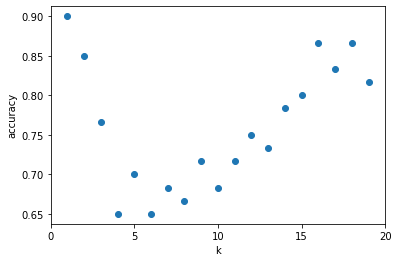

In [35]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

#It's at the cell below. 

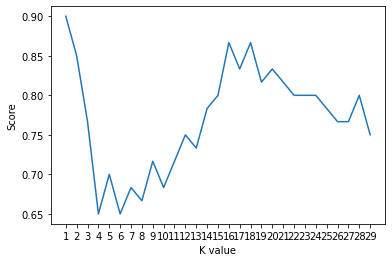

KNN Acc Max 90.00%


In [36]:
scoreListknn = []
for i in range(1,30):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,30), scoreListknn)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAccMax = max(scoreListknn)
print("KNN Acc Max {:.2f}%".format(KNAccMax*100))

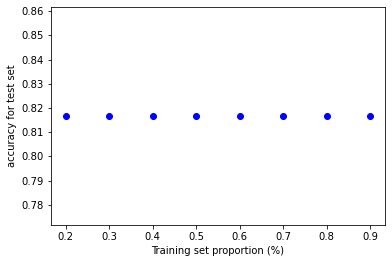

In [37]:
t = [0.9, 0.8, 0.70, 0.6, 0.5, 0.4, 0.3, 0.2]

plt.figure()

for s in t: # s is the training size. 

    scores = []
    for i in range(1,50):
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy for test set');


In [38]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       DrugY       0.80      0.93      0.86        30
       drugA       1.00      0.80      0.89         5
       drugB       1.00      0.33      0.50         3
       drugC       1.00      1.00      1.00         4
       drugX       0.88      0.78      0.82        18

    accuracy                           0.85        60
   macro avg       0.93      0.77      0.81        60
weighted avg       0.86      0.85      0.84        60

[[28  0  0  0  2]
 [ 1  4  0  0  0]
 [ 2  0  1  0  0]
 [ 0  0  0  4  0]
 [ 4  0  0  0 14]]


In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
y_probs = knn.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovr')
print("Overall ROC AUC: {:.3f}".format(roc_auc))

Overall ROC AUC: 0.964


In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

In [41]:
y_test_labels = lb.classes_

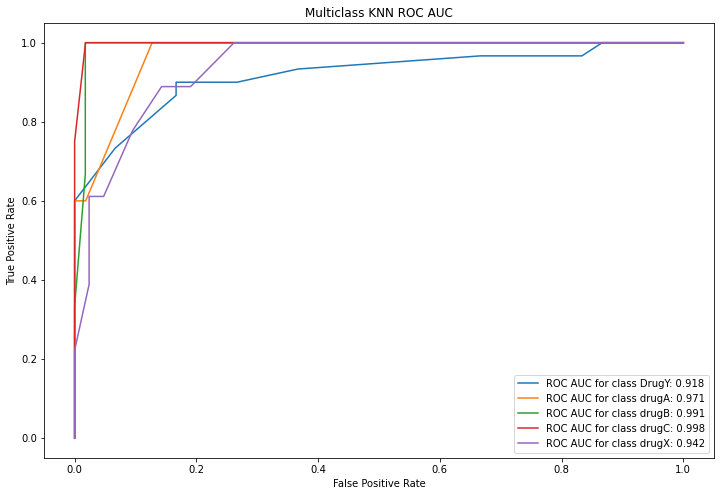

In [42]:
plt.figure(figsize=(12,8))
for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC AUC for class {}: {:.3f}'.format(y_test_labels[i], roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass KNN ROC AUC')
plt.legend()
plt.show()